##### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Carga de datos

In [49]:
path = 'output/data.csv'
data = pd.read_csv(path)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29138 entries, 0 to 29137
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   N°         29138 non-null  int64 
 1   MODALIDAD  29138 non-null  object
 2   DNI        29138 non-null  object
 3   REGION     29138 non-null  object
 4   PJ ENP     29138 non-null  int64 
 5   PJ CP      29138 non-null  int64 
 6   PJ FIN     29138 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.6+ MB


Descripción de los campos:
* N°: número de registro (int)
* MODALIDAD: tipo de beca (object)
* DNI: número de identificación (object)
* REGION: region de procedencia del postulante (objetc)
* PJ ENP: puntaje del examen (int)
* PJ CP: puntaje adicional por condiciones priorizables (int)
* PJ FIN: puntaje final [PJ ENP + PJ CP] (int)

In [ ]:
# Convertir campo numerico a categorico
data.DNI = data.DNI.astype(str)

In [53]:
x,y = data.shape
print('Cantidad de postulantes preseleccionados:',x)

Cantidad de postulantes preseleccionados: 29138


##### Cantidad de Postulantes por Región

In [54]:
'''
Se crea una función para realizar gráficos por un campo categórico de una columna
'''

def grafica_por_categoria(data, category, x_size=12, y_size=4, titulo='Frecuencia por {category}'):
    # Contar las frecuencias de cada categoría
    counts = data[category].value_counts().sort_values(ascending=True)

    # Crear una figura con tamaño especifico
    plt.figure(figsize=(x_size, y_size))

    # Crear el gráfico de barras horizontales
    ax = counts.plot(kind='barh', width=0.8)

    ax.set_ylabel('') # Eliminar el titulo del eje Y
    ax.set_xticklabels([]) # Elimina las marcas del eje X

    # Agregar los valores sobre las barras
    for p in ax.patches:
        ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2,
                f'{p.get_width():.0f}', va='center')

    # Eliminar los bordes (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Agregar un titulo al grafico
    ax.set_title(titulo, fontsize=12)

    # Mostrar el gráfico
    plt.show()


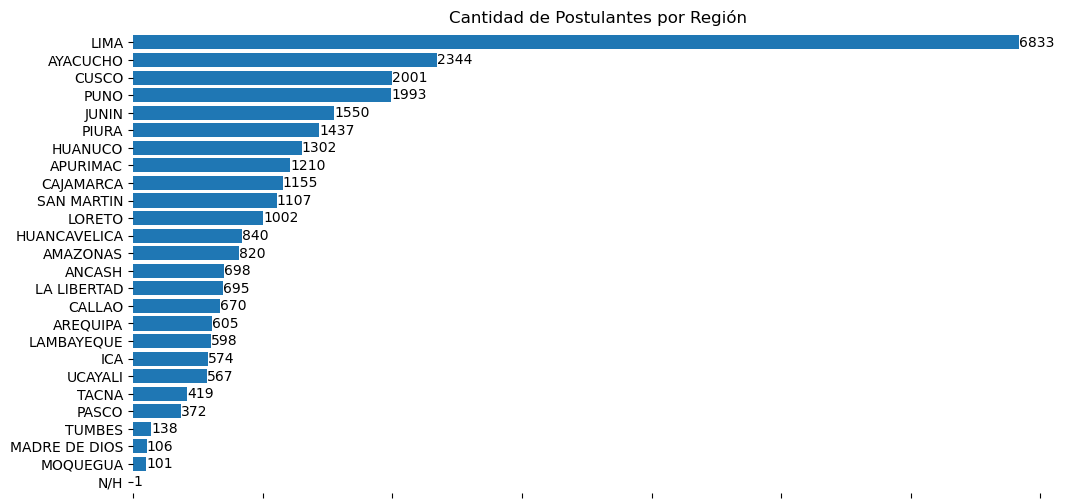

In [5]:
grafica_por_categoria(data, category='REGION', y_size=6, titulo='Cantidad de Postulantes por Región')

* El porcentaje de postulantes preseleccionados de Lima representa el 23.45% del total de regiones.
* Las 3 regiones con la mayor cantidad de postulantes provienen de Lima, Ayacucho y Cusco.
* Hay un postulante que no tiene registrado el campo de REGION y se indica como N/H.

##### Cantidad de Postulantes por Modalidad de Beca

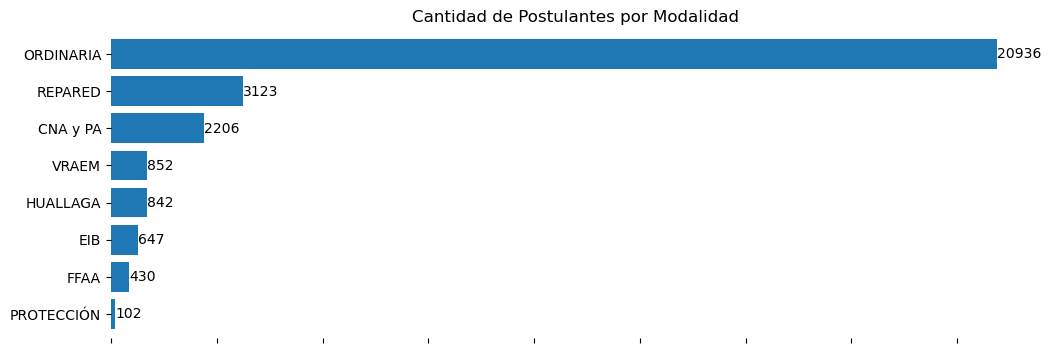

In [6]:
grafica_por_categoria(data, category='MODALIDAD', y_size=4, titulo='Cantidad de Postulantes por Modalidad')

* La mayor parte postula a la categoría ORDINARIA que representa el 71.85% del total
* Las otras modalidades tienen una demanda menor como Beca FF.AA. y Beca Protección.

##### Cantidad de Postulantes por Región y Modalidad

In [7]:
regiones = list(data['REGION'].unique())

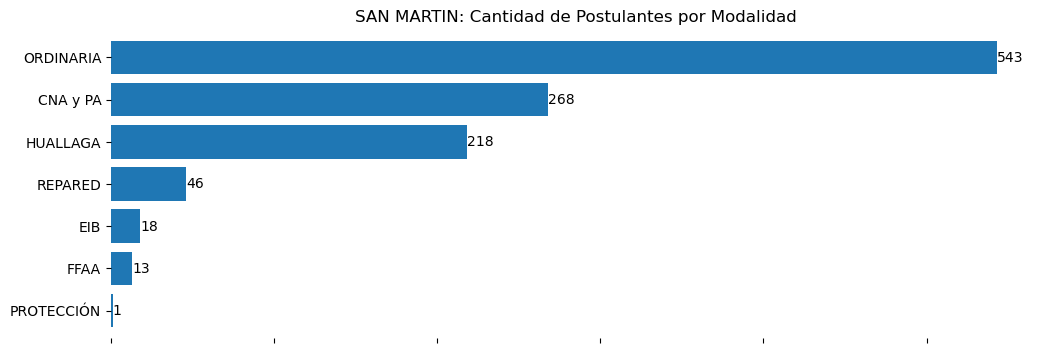

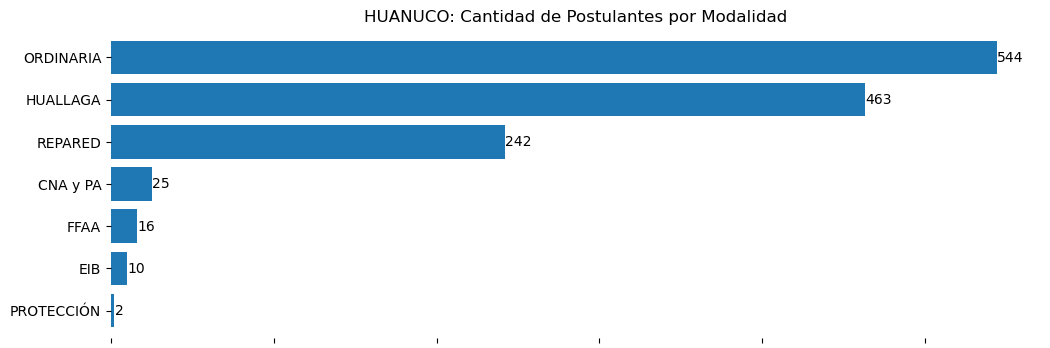

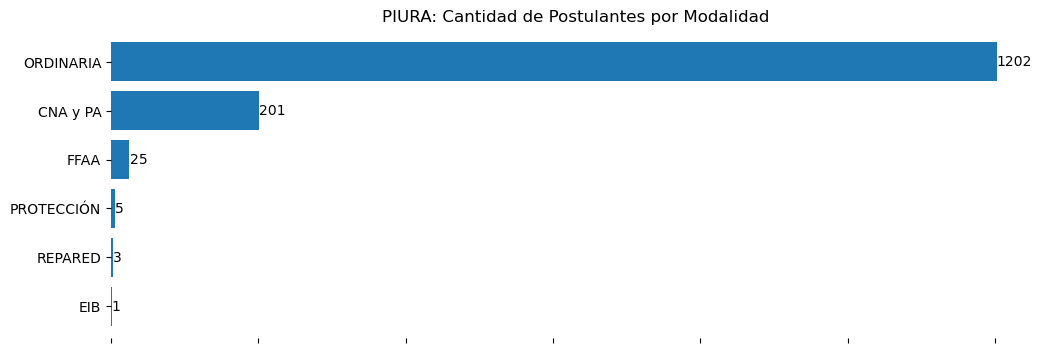

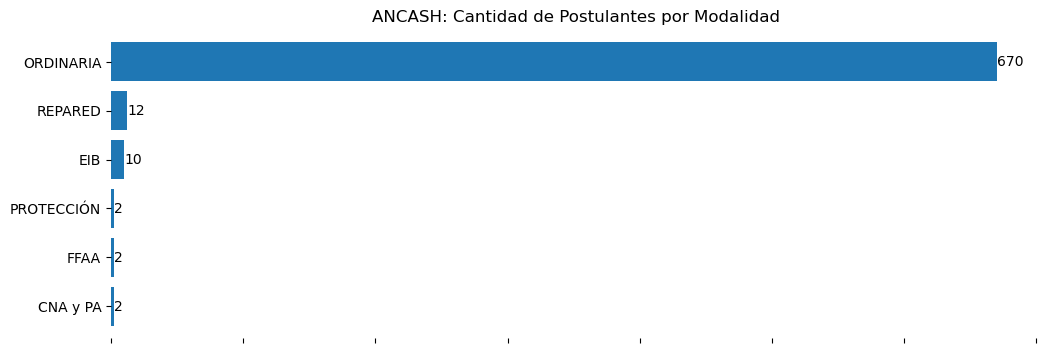

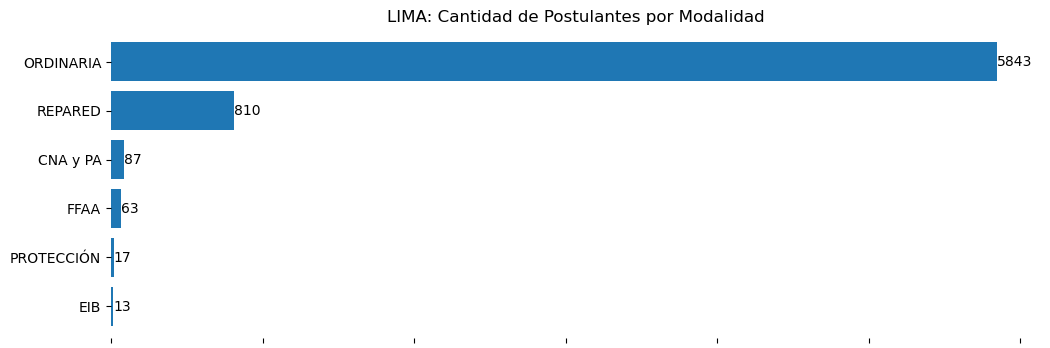

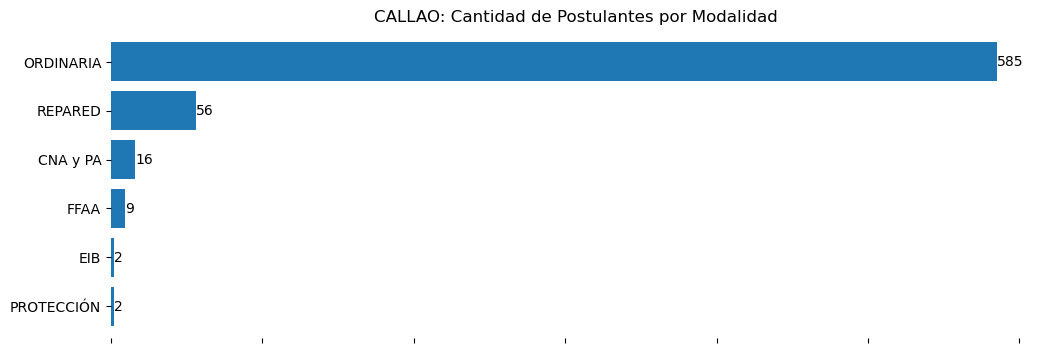

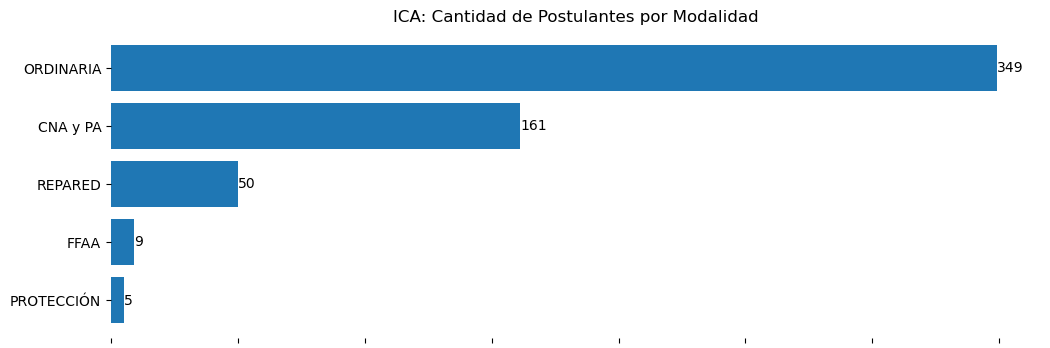

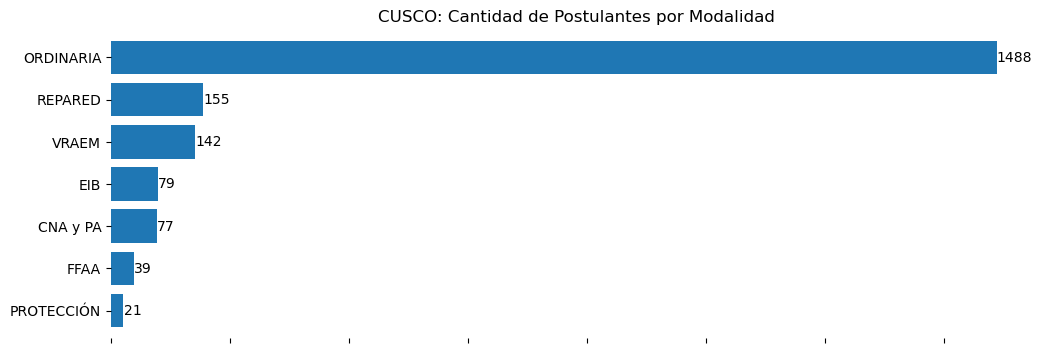

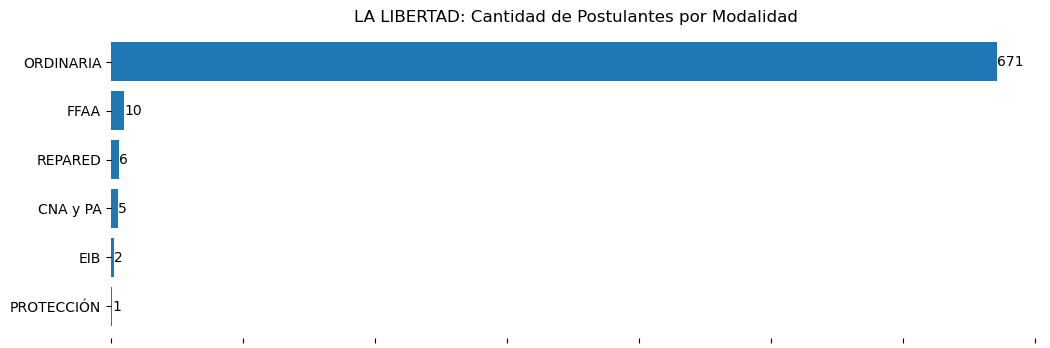

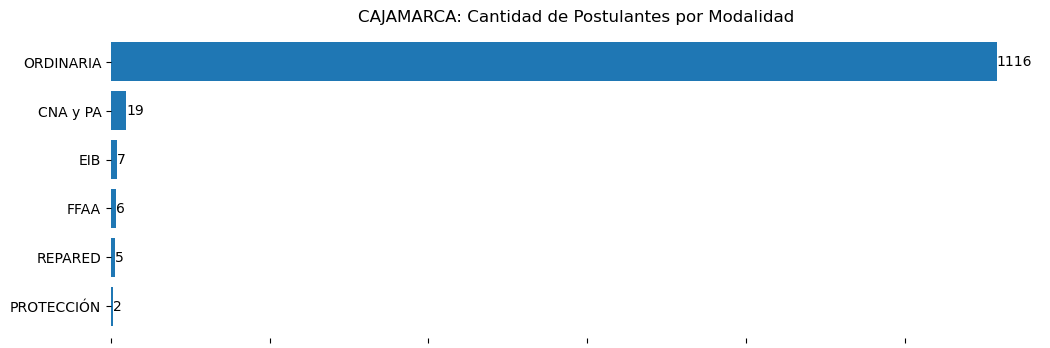

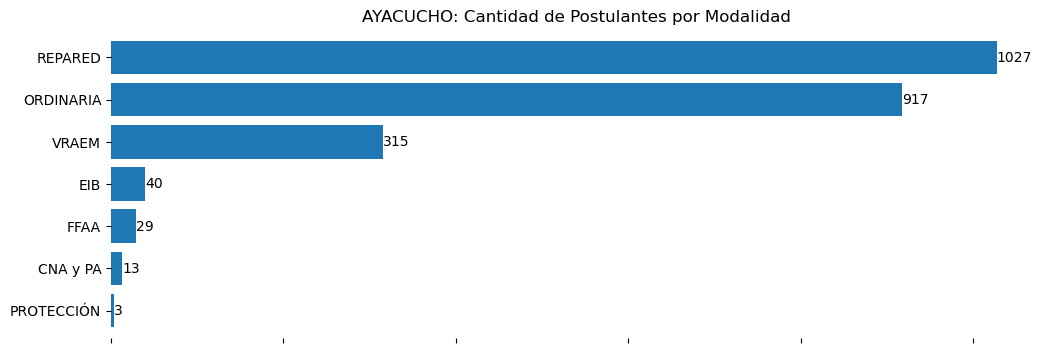

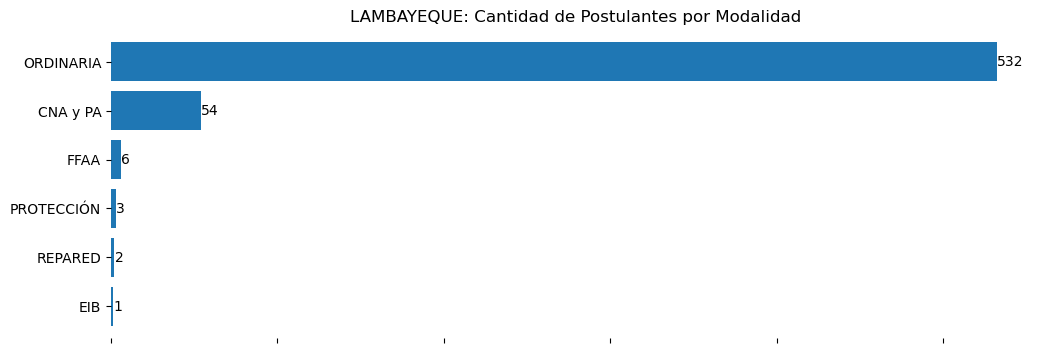

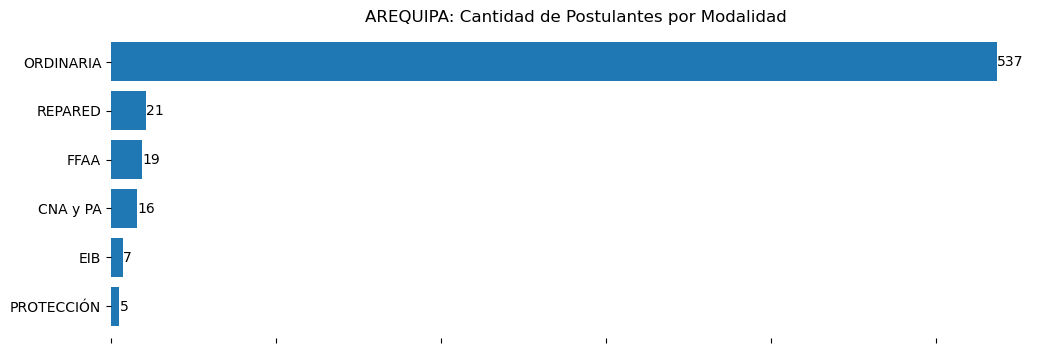

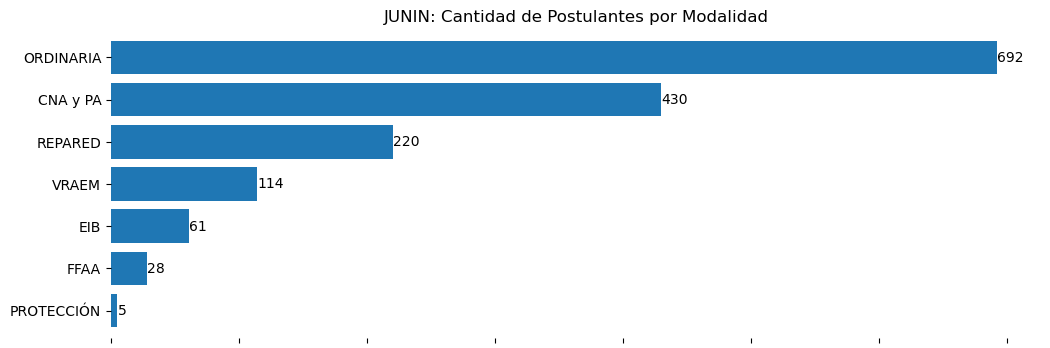

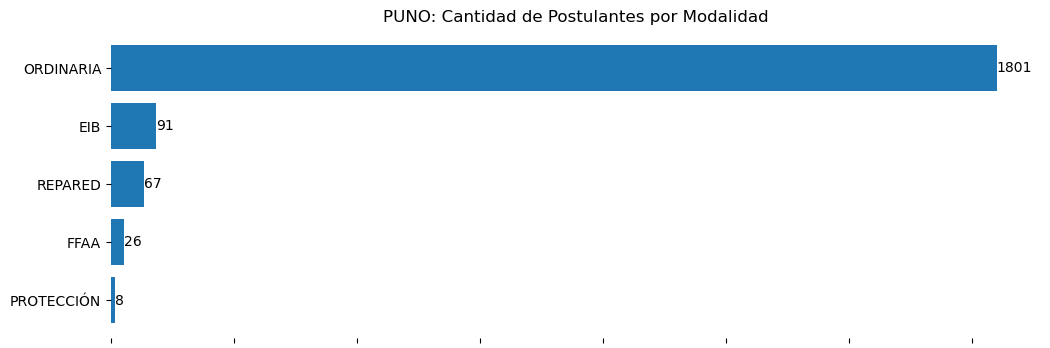

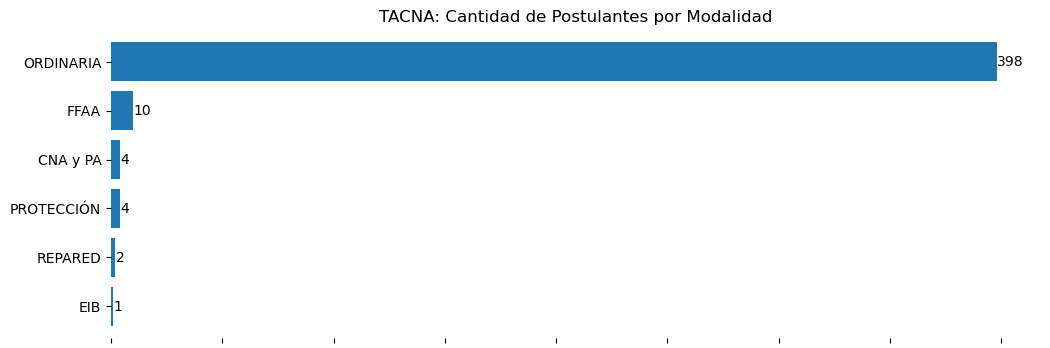

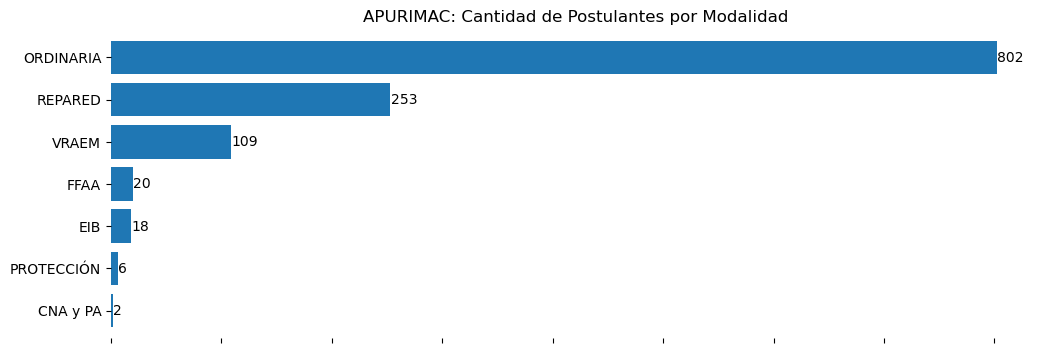

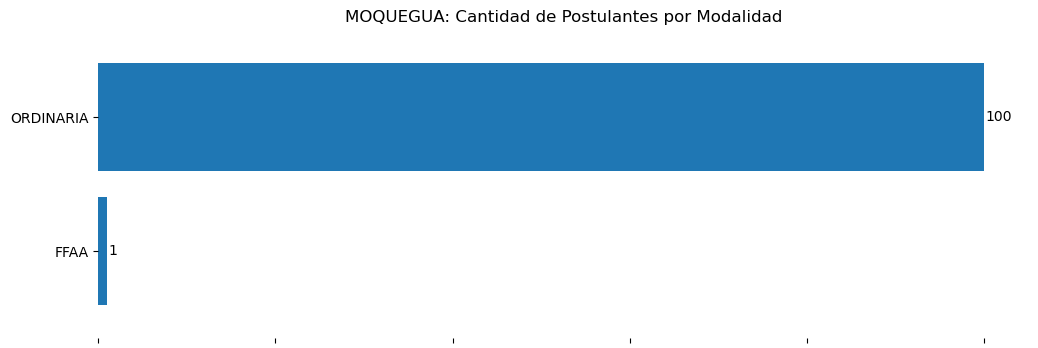

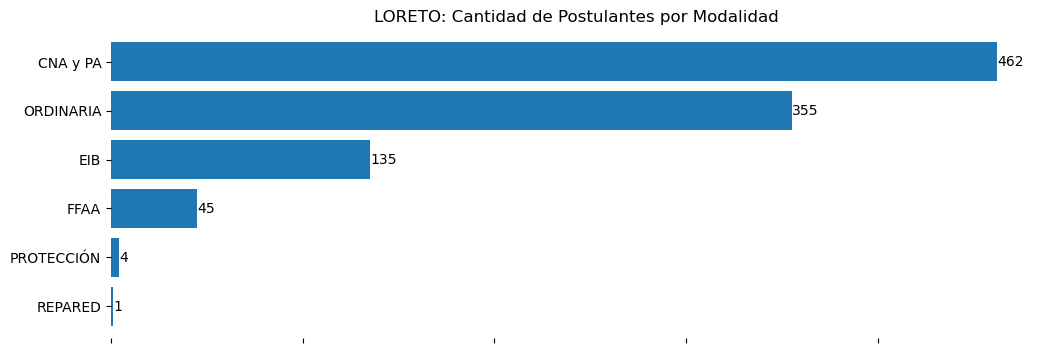

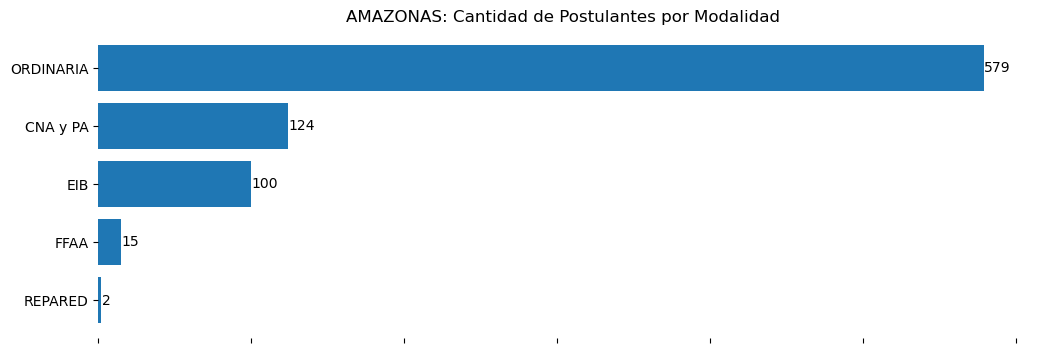

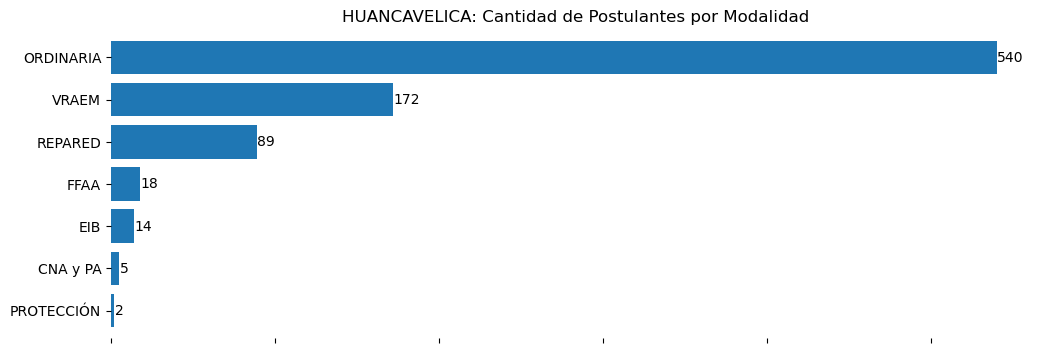

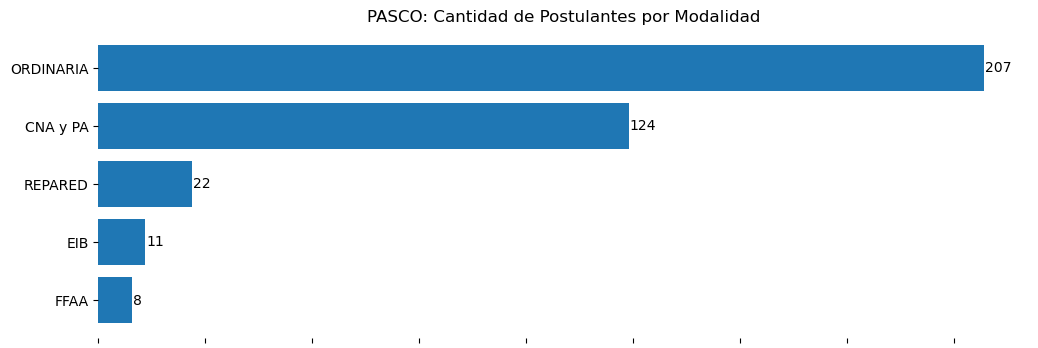

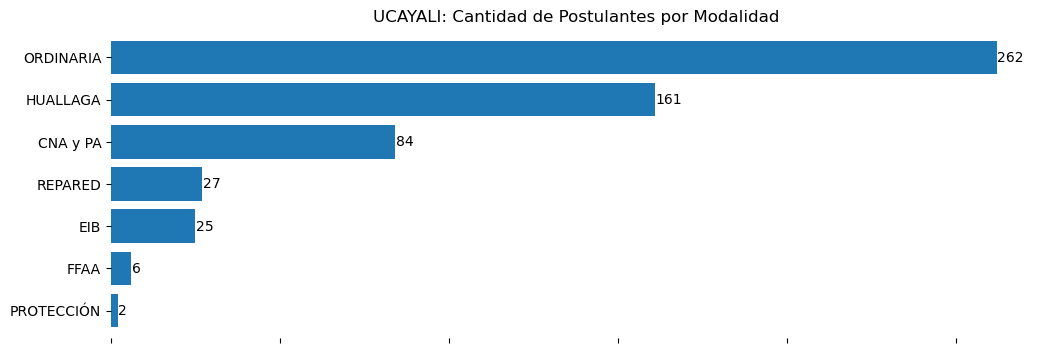

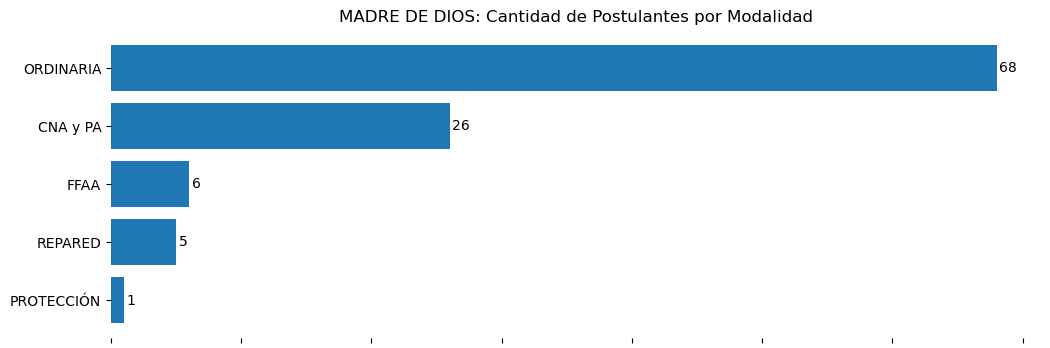

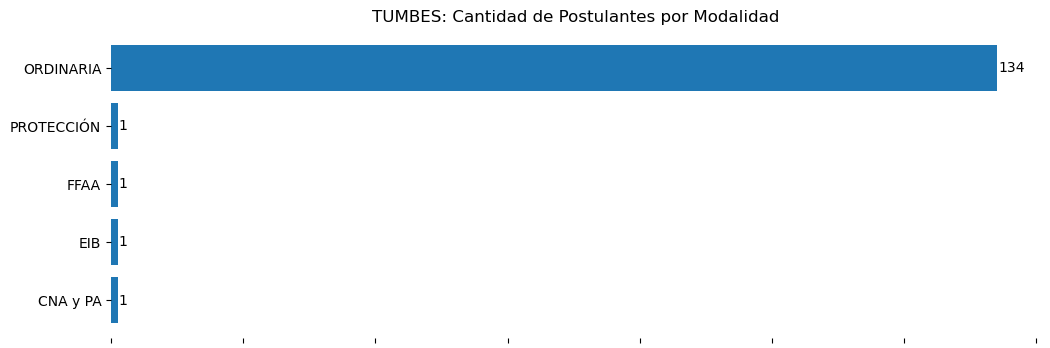

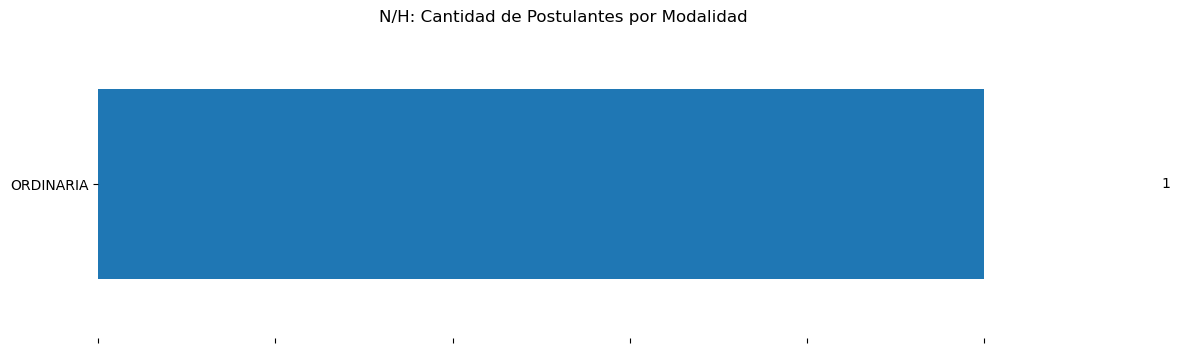

In [8]:
for rg in regiones:
    df_rg = data[data['REGION']==rg]
    grafica_por_categoria(df_rg, category='MODALIDAD', y_size=4, titulo=f'{rg}: Cantidad de Postulantes por Modalidad')

* La categoria ORDINARIA es la más demandada en la mayoría de las regiones. Excepto en Ayacucho y Loreto, donde la categoría CNA y PA presenta la mayor cantidad de postulantes.
* La segunda modalidad de beca más demandada es CNA Y PA o REPARED.

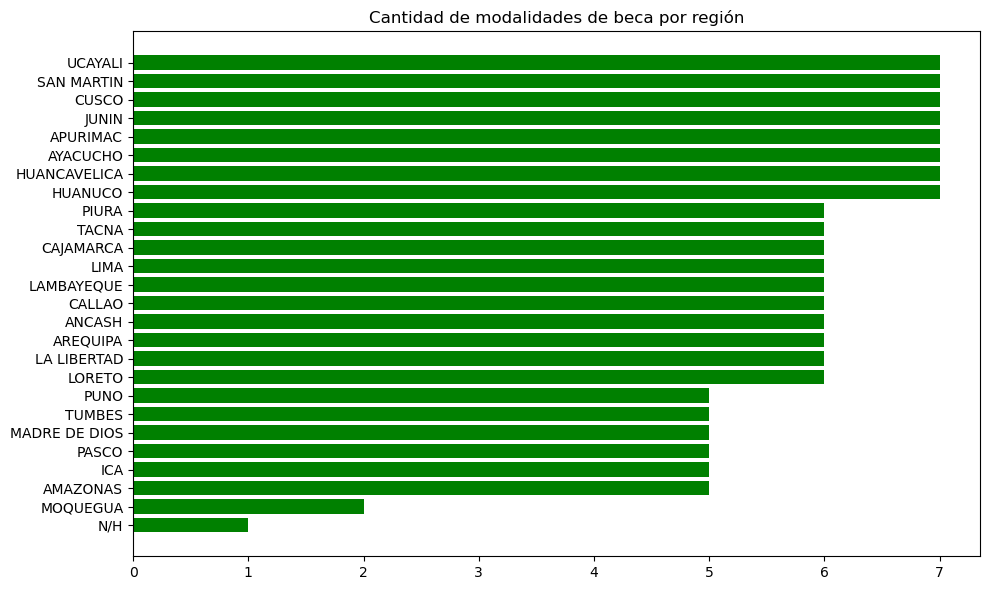

In [12]:
# Agrupamos por región y modalidad de beca, y luego contamos cuántos registros hay por cada combinación
conteo_modalidades_por_region = data.groupby('REGION')['MODALIDAD'].nunique().reset_index(name='num_modalidades').sort_values(by='num_modalidades')

# Graficamos el conteo de modalidades por región
plt.figure(figsize=(10, 6))
plt.barh(conteo_modalidades_por_region['REGION'], conteo_modalidades_por_region['num_modalidades'], color='green')
plt.title('Cantidad de modalidades de beca por región')
plt.tight_layout()
plt.show()

* En la mayoría de regiones la demanda se distribuye entre 5 a 7 modalidades de beca.
* En Moquegua, la demanda se enfoca para dos tipos de beca: ORDINARIA y FFAA. Pero, la demanda se concentra solo en la beca ORDINARIA porque solo un postulante participa por la modalidad FFAA.

##### Oferta y Demanda

Si se evalua la oferta que tiene PRONABEC por modalidad y momento (1 y 2). Se obtiene esta información de las bases de la convocatoria.

In [13]:
path_oferta = 'input/oferta.xlsx'
oferta = pd.read_excel(path_oferta)
oferta

,MODALIDAD,MOMENTO,UNIVERSIDAD,INSTITUTO,TOTAL
0,ORDINARIA,1,6696,1584,8280
1,PROTECCIÓN,1,240,36,276
2,CNA y PA,1,624,252,876
3,EIB,1,240,0,240
4,FFAA,1,240,96,336
5,HUALLAGA,1,240,96,336
6,REPARED,1,1080,240,1320
7,VRAEM,1,240,96,336
8,ORDINARIA,2,4464,1056,5520
9,PROTECCIÓN,2,160,24,184


In [14]:
# Agrupar por MODALIDAD y calcular la suma de cada grupo
of_sum = oferta.groupby(by='MODALIDAD').sum()

# Ordenar por la columna TOTAL en orden descendente
of_mod_ordenado = of_sum.sort_values(by='MODALIDAD')

# Selecciona solo la columna TOTAL
of_mod_series = of_mod_ordenado['TOTAL']

# Cuenta postulantes por modalidad
dm_mod_series = data['MODALIDAD'].value_counts().sort_values(ascending=False)

# Convertir las series en DataFrames y pasando el indice a columna
of_mod = of_mod_series.to_frame().reset_index(drop=False, inplace=False)
dm_mod = dm_mod_series.to_frame().reset_index(drop=False, inplace=False)


In [15]:
df_combined = of_mod.merge(dm_mod, how='inner', on='MODALIDAD')
df_combined.columns = ['Modalidad','Oferta','Demanda']
df_combined

,Modalidad,Oferta,Demanda
0,CNA y PA,1460,2206
1,EIB,400,647
2,FFAA,560,430
3,HUALLAGA,560,842
4,ORDINARIA,13800,20936
5,PROTECCIÓN,460,102
6,REPARED,2200,3123
7,VRAEM,560,852


In [16]:
# Asegúrate de que 'MODALIDAD' es una columna y no el índice
df_combined.set_index('Modalidad', inplace=True)

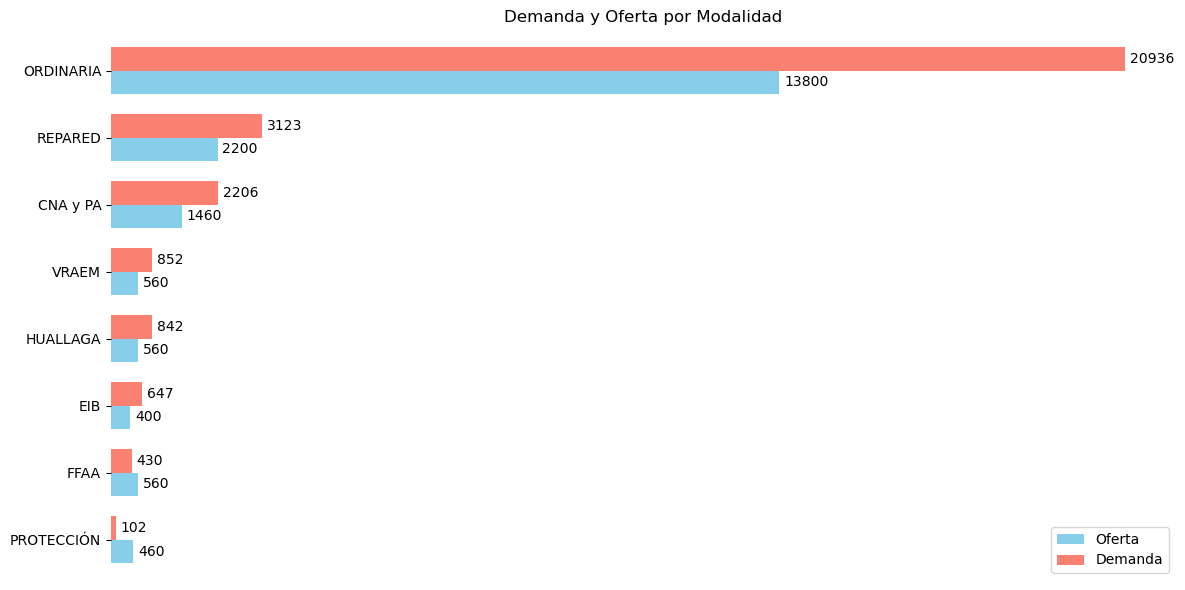

In [17]:
# Supongamos que 'resultado' es la serie que obtuviste
ax = df_combined.sort_values(by='Demanda',ascending=True).plot(kind='barh', figsize=(12,6), color=['skyblue', 'salmon'], width=0.7)

# Personalizar el gráfico
plt.title('Demanda y Oferta por Modalidad')

# Quitar los valores del eje vertical (ticks)
plt.xticks([])
ax.set_ylabel('')  # Eliminar el título del eje vertical

# Quitar el contorno alrededor del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Agregar los valores a las barras
for p in ax.patches:
    width = p.get_width()  # Obtiene el valor de la barra
    ax.text(width + 100, p.get_y() + p.get_height() / 2, str(int(width)), 
            va='center', ha='left', color='black', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* En las 6 primeras categorías, aproximadamente entre 3 y 4 de cada 10 postulantes no accederían a una de las becas de su modalidad.
* En la Beca FF.AA., todos los preseleccionados accederían a una de estas becas integrales suponiendo que presentan la carta de ingreso a una IES. Este es el apartado donde aparece una pregunta ¿qué sucede con las 130 (560-430) becas adicionales de esta modalidad suponiendo que las 430 becas ya estarían asignadas a un postulante? ¿Se distribuye estas becas para otras modalidades? ¿Cómo se aborda está situación?
* De la misma forma, en la Beca Protección todos los preseleccionados de esta modalidad accederían a una de estas becas integrales. ¿Qué sucede con estas 358 (460-102) becas adicionales de esta modalidad? 

##### Distribución general del Puntaje Examen

In [20]:
def showDistribution(df, col, color, bins):
    # Histograma del puntaje final
    plt.figure(figsize=(12, 6))
    plt.hist(df[col], bins=bins, alpha=0.7, color=color, edgecolor=color)

    # Calcular los cuartiles, mediana y rango intercuartílico
    min = np.min(df[col])
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    median = np.median(df[col])
    max = np.max(df[col])

    # Añadir líneas para los cuartiles y la mediana
    plt.axvline(min, color='black', alpha=0, linestyle='dashed', linewidth=2, label=f'Minimo: {min:.2f}')
    plt.axvline(Q1, color='black', alpha=0, linestyle='dashed', linewidth=1.5, label=f'Q1: {Q1:.2f}')
    plt.axvline(median, color='black', alpha=0, linestyle='dashed', linewidth=1.5, label=f'Mediana: {median:.2f}')
    plt.axvline(Q3, color='black', alpha=0, linestyle='dashed', linewidth=1.5, label=f'Q3: {Q3:.2f}')
    plt.axvline(max, color='black', alpha=0, linestyle='dashed', linewidth=2, label=f'Maximo: {max:.2f}')

    # Titulos
    # plt.xlabel('Puntaje Final')
    # plt.ylabel('Número de Postulantes')
    plt.title(f'Distribución de: {col}')

    plt.legend()
    plt.grid(False)
    plt.show()

In [55]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
N°,29138.0,7772.93,6670.30,1.0,1418.0,6331.5,13615.75,20900.0
PJ ENP,29138.0,74.69,14.94,2.0,66.0,74.0,84.00,116.0
PJ CP,29138.0,8.00,6.34,0.0,2.0,7.0,12.00,35.0
PJ FIN,29138.0,82.69,13.15,8.0,75.0,82.0,91.00,131.0


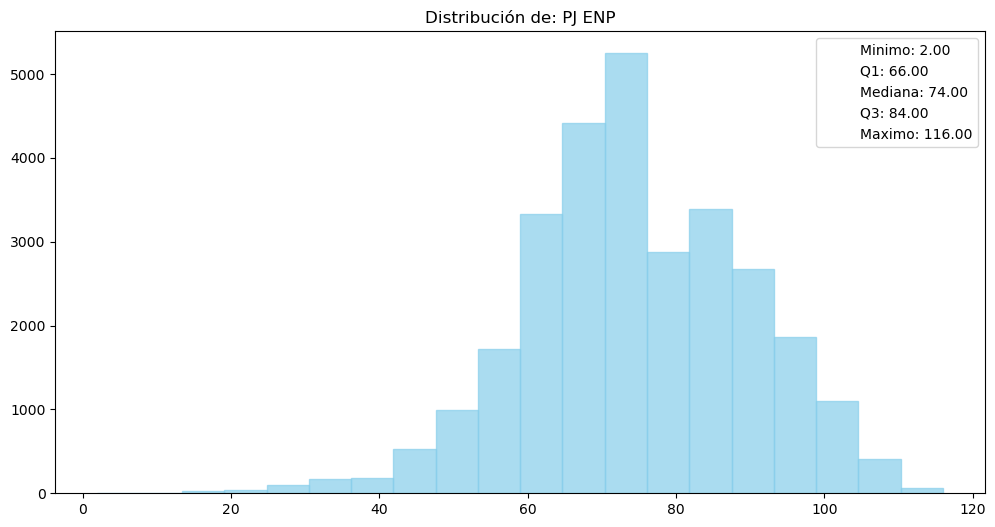

In [21]:
showDistribution(df=data, col='PJ ENP', color='skyblue', bins=20)

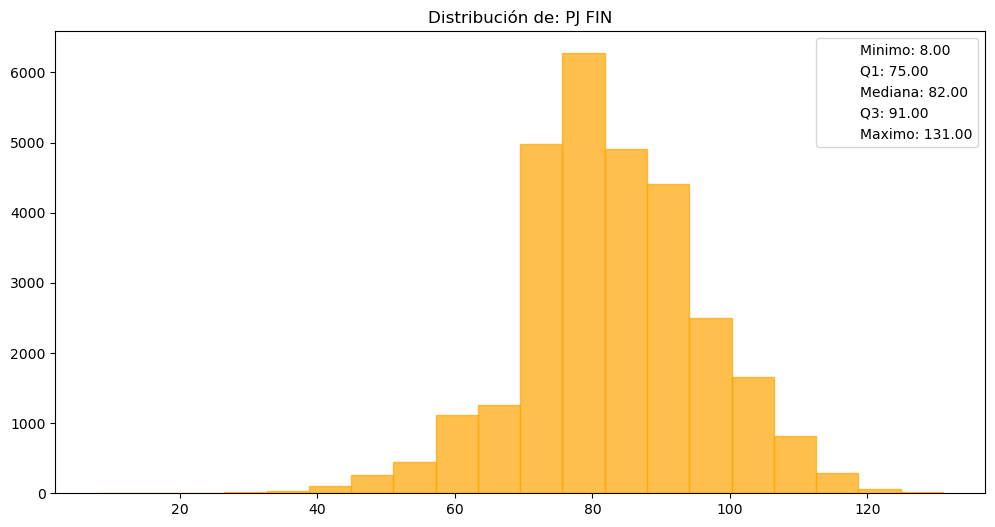

In [22]:
showDistribution(df=data, col='PJ FIN', color='orange', bins=20)

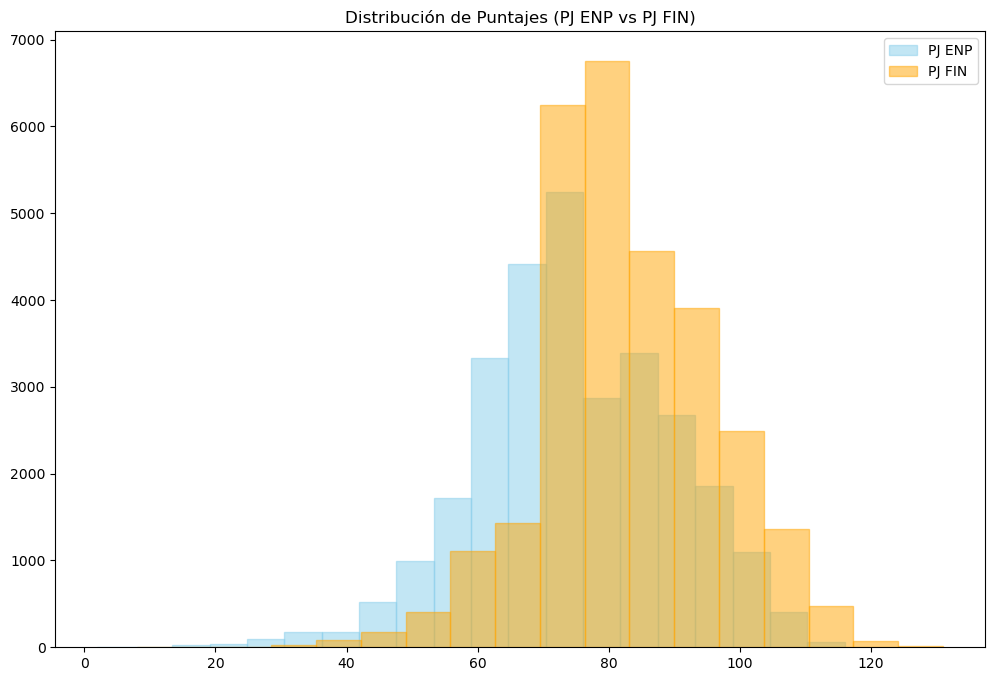

In [23]:
# Graficar los histogramas de las dos columnas en el mismo gráfico
plt.figure(figsize=(12,8))

# Histograma de la columna "PJ ENP"
plt.hist(data['PJ ENP'], bins=20, alpha=0.5, label='PJ ENP', color='skyblue', edgecolor='skyblue')

# Histograma de la columna "PJ FIN"
plt.hist(data['PJ FIN'], bins=18, alpha=0.5, label='PJ FIN', color='orange', edgecolor='orange')

# Etiquetas y título
plt.title('Distribución de Puntajes (PJ ENP vs PJ FIN)')
plt.grid(False)

# Leyenda para identificar las columnas
plt.legend()

# Mostrar el gráfico
plt.show()

* El puntaje adicional aumenta signficativamente el desempeño final del postulante, lo cual genera un desplazamiento horizontal hacia la derecha del puntaje final asignado y con mayor probabilidad de acceder a una de las becas del concurso.
* El mayor puntaje adicional fue de 35 puntos, el cual fue asignado a dos postulantes bajo la modalidad de EIB. Algunas condiciones que se consideran son:
    * Clasificación SISFOH
    * Tasa de transición IES
    * Participación en actividades extracurriculares
    * Otras* (para mayor detalle consultar las bases del concurso)


In [57]:
data[data['PJ CP'] == 35]

,N°,MODALIDAD,DNI,REGION,PJ ENP,PJ CP,PJ FIN
23527,351,EIB,60594151,LORETO,56,35,91
23652,476,EIB,81509654,AMAZONAS,28,35,63


##### Distribución de Puntaje Examen por Modalidad de Beca

In [72]:
def calcular_estadisticas(df, grupo, columna):
    grouped = df.groupby(grupo)[columna]
    stats = pd.DataFrame({
        'MIN': grouped.min(),
        'IQR LOW': grouped.quantile(0.25) - 1.5 * (grouped.quantile(0.75) - grouped.quantile(0.25)),
        'Q1': grouped.quantile(0.25),
        'Q2': grouped.median(),
        'Q3': grouped.quantile(0.75),
        'IQR SUP': grouped.quantile(0.75) + 1.5 * (grouped.quantile(0.75) - grouped.quantile(0.25)),
        'MAX': grouped.max(),
        'IQR': grouped.quantile(0.75) - grouped.quantile(0.25),
        'COUNT': df[grupo].value_counts(),
        'AVG': grouped.mean().round(2)
    }).reset_index()
    
    return stats

In [74]:
calcular_estadisticas(data, 'MODALIDAD', 'PJ ENP')

,MODALIDAD,MIN,IQR LOW,Q1,Q2,Q3,IQR SUP,MAX,IQR,COUNT,AVG
0,CNA y PA,6,28.0,52.0,58.0,68.0,92.0,112,16.0,2206,61.06
1,EIB,2,-26.0,34.0,52.0,74.0,134.0,104,40.0,647,54.50
2,FFAA,10,19.0,46.0,54.0,64.0,91.0,98,18.0,430,55.94
3,HUALLAGA,52,38.0,62.0,70.0,78.0,102.0,108,16.0,842,71.40
4,ORDINARIA,48,43.0,70.0,78.0,88.0,115.0,114,18.0,20936,78.66
5,PROTECCIÓN,30,17.0,50.0,60.0,72.0,105.0,108,22.0,102,62.47
6,REPARED,14,21.0,54.0,64.0,76.0,109.0,116,22.0,3123,65.57
7,VRAEM,52,42.0,66.0,74.0,82.0,106.0,110,16.0,852,75.11


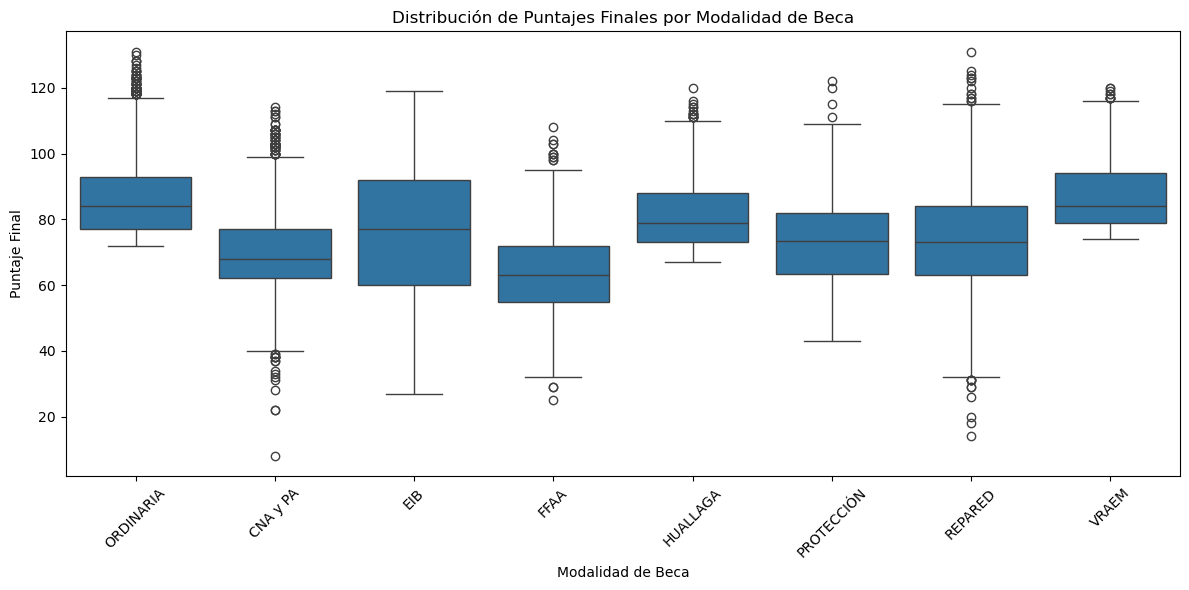

In [66]:
# Boxplot de puntajes finales por modalidad de beca
plt.figure(figsize=(12, 6))
sns.boxplot(x='MODALIDAD', y='PJ FIN', data=data)
plt.xlabel('Modalidad de Beca')
plt.ylabel('Puntaje Final')
plt.title('Distribución de Puntajes Finales por Modalidad de Beca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- *EIB* muestra la mayor variabilidad en los puntajes, lo que indica una diversidad significativa en el desempeño de los postulantes.  
- *ORDINARIA* tiene la mediana más alta, indicando mejor desempeño promedio.  
- *FFAA* y *CNA y PA* presentan puntajes más bajos y menos dispersión.  
- *REPARED* y *PROTECCIÓN* tienen muchos valores atípicos en puntajes altos, lo que signfica que algunos postulantes lograron resultados sobresalientes.
- *VRAEM* y *HUALAGA* son similares, pero *VRAEM* tiene una ligera ventaja por la concentración en puntajes altos.

##### Distribución de Puntaje Examen por Región

In [75]:
calcular_estadisticas(data, 'REGION', 'PJ ENP')

,REGION,MIN,IQR LOW,Q1,Q2,Q3,IQR SUP,MAX,IQR,COUNT,AVG
0,AMAZONAS,16,31.00,58.0,66.0,76.0,103.00,108,18.0,820,65.76
1,ANCASH,36,49.00,70.0,76.0,84.0,105.00,114,14.0,698,77.53
2,APURIMAC,6,33.00,60.0,68.0,78.0,105.00,114,18.0,1210,69.70
3,AREQUIPA,36,50.00,74.0,80.0,90.0,114.00,114,16.0,605,81.38
4,AYACUCHO,14,33.00,60.0,68.0,78.0,105.00,116,18.0,2344,68.69
5,CAJAMARCA,32,47.00,68.0,74.0,82.0,103.00,112,14.0,1155,75.17
6,CALLAO,38,52.00,76.0,82.0,92.0,116.00,112,16.0,670,83.28
7,CUSCO,22,40.00,64.0,72.0,80.0,104.00,114,16.0,2001,71.97
8,HUANCAVELICA,24,40.00,64.0,70.0,80.0,104.00,110,16.0,840,72.19
9,HUANUCO,24,38.00,62.0,70.0,78.0,102.00,108,16.0,1302,70.95


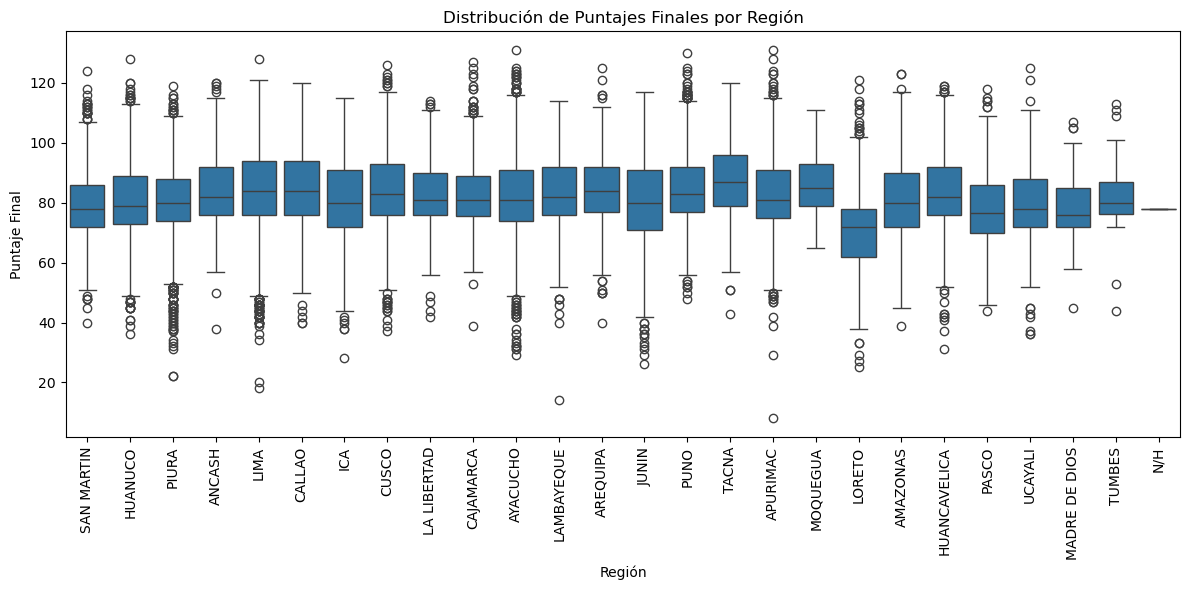

In [68]:
# Boxplot de puntajes finales por región
plt.figure(figsize=(12, 6))
sns.boxplot(x='REGION', y='PJ FIN', data=data)
plt.xlabel('Región')
plt.ylabel('Puntaje Final')
plt.title('Distribución de Puntajes Finales por Región')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- *Lima* y *Callao* tienen medianas altas y menor dispersión, indicando puntajes más consistentes.  
- *Loreto* y *Ucayali* presentan menor mediana y mayor dispersión, reflejando mayor variabilidad en desempeño.  
- *Tumbes* muestra poca dispersión y ausencia de valores extremos, lo que sugiere resultados más homogéneos.